In [23]:
import networkx as nx
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 10
from collections import defaultdict
filename = "edges.txt"
G = nx.read_edgelist(filename)

In [24]:
from collections import Counter
degrees = Counter(nx.degree(G).values())
sorted_degree_values = sorted(degrees.keys())
counts = [degrees[d] for d in sorted_degree_values]

In [31]:
from scipy.optimize import curve_fit
import numpy as np

def func(d, c, gamma):
    return float(c) / ( d ** gamma )

h1, h2 = 8, 110
xdata = np.array(sorted_degree_values[h1:h2])
ydata = np.array(counts[h1:h2])
popt, pcov = curve_fit(func, xdata, ydata)
c, gamma = popt
print c, gamma

45093.983909 2.13719689277


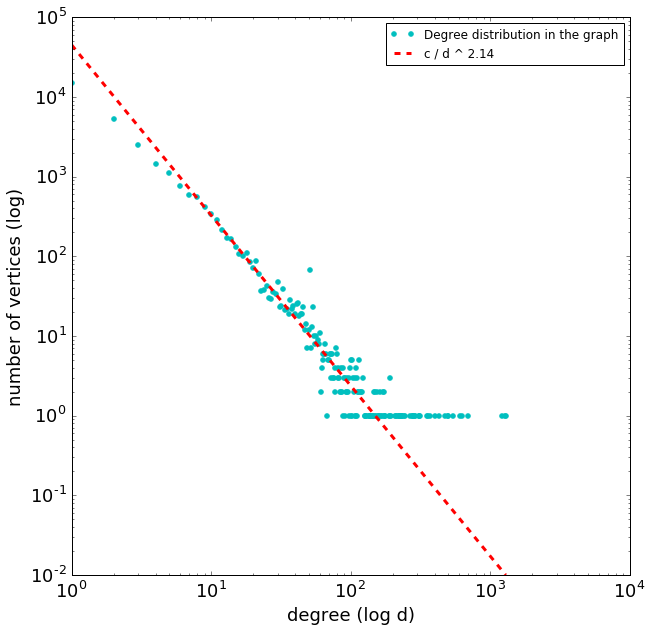

In [34]:
plt.loglog(sorted_degree_values, counts, ls='None', marker='.', markersize=10,
           color='c', label=u"Degree distribution in the graph")
estimated = [func(d, c, gamma) for d in sorted_degree_values]
plt.loglog(sorted_degree_values,
           estimated,
           ls='--',color='r',linewidth=3,label=u"c / d ^ %.2f" % gamma)

plt.xlabel(u"degree (log d)", fontsize=18)
plt.ylabel(u"number of vertices (log)", fontsize=18)
plt.legend()